In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Data Description

There are 891 entries in the train data set, and 418 entries in the test data set.
PassengerId is just an index, therefore it should be removed.

Out of 10 features,3 are categorical.
1. Pclass-ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
2. Sex - female/male
3. embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

4 are numerical
1. Age
2. Sibsp
3. Parch
4. Fare

3 should be further processed
1. Name
2. Cabin
3. Ticket

- Considering the number of missing values, 'Cabin' Field only contains data for 1/4th of the total data set.Therefore the column is removed.

In [3]:
print(f'size of the train set :',train.shape)
print(f'size of the test set :',test.shape)

size of the train set : (891, 12)
size of the test set : (418, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Single Variable Analysis

### Categorical Variables

##### 'Sex','Pclass', 'Embarked'

<AxesSubplot: xlabel='Embarked', ylabel='Embarked%'>

<Figure size 1800x1000 with 0 Axes>

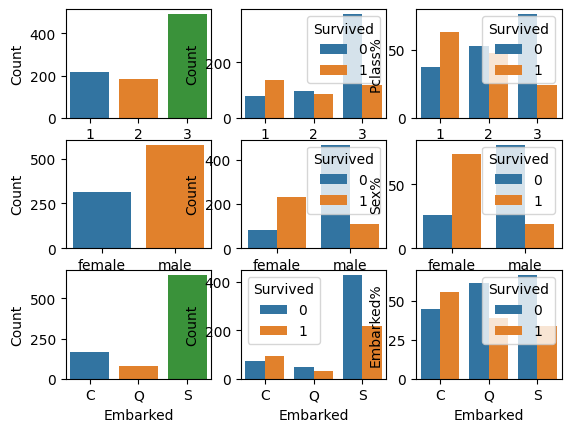

In [5]:
# creating the bar plot
#define dimensions of subplots (rows, columns)
plt.figure(figsize=(18,10))
fig, axes = plt.subplots(3, 3)

#Pclass
train_pclass_total = train.groupby(['Pclass']).size().reset_index(name = 'Count')
sns.barplot(data = train_pclass_total, x = 'Pclass', y= 'Count', ax=axes[0,0])
train_pclass = train.groupby(['Pclass','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_pclass, x = 'Pclass', y= 'Count', hue = 'Survived', ax=axes[0,1])
train_pclass['Pclass%'] = 100* train_pclass['Count']/train_pclass.groupby(['Pclass'])['Count'].transform('sum')
sns.barplot(data = train_pclass, x = 'Pclass', y= 'Pclass%', hue = 'Survived', ax=axes[0,2])

#Sex
train_Sex_total = train.groupby(['Sex']).size().reset_index(name = 'Count')
sns.barplot(data = train_Sex_total, x = 'Sex', y= 'Count', ax=axes[1,0])
train_sex = train.groupby(['Sex','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_sex, x = 'Sex', y= 'Count', hue = 'Survived', ax=axes[1,1])
train_sex['Sex%'] = 100* train_sex['Count']/train_sex.groupby(['Sex'])['Count'].transform('sum')
sns.barplot(data = train_sex, x = 'Sex', y= 'Sex%', hue = 'Survived', ax=axes[1,2])

#Embarked
train_Embarked_total = train.groupby(['Embarked']).size().reset_index(name = 'Count')
sns.barplot(data = train_Embarked_total, x = 'Embarked', y= 'Count', ax=axes[2,0])
train_embarked = train.groupby(['Embarked','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_embarked, x = 'Embarked', y= 'Count', hue = 'Survived', ax=axes[2,1])
train_embarked['Embarked%'] = 100* train_embarked['Count']/train_embarked.groupby(['Embarked'])['Count'].transform('sum')
sns.barplot(data = train_embarked, x = 'Embarked', y= 'Embarked%', hue = 'Survived', ax=axes[2,2])

- With regard to PClass, Overall count is highest for class 3(around 500), second highest is for class 1 and lowest is for class 2. However,portion of survivals are highest in class 1, class 2 and 3 respectively.Over 60% of class 1 survived while the percentage of survival for class 3 is less than 25%.
- With regard to the field 'Sex', overall 'male' count is higher than that of 'female'.However, number of females survived is still greater than the number of males survived.Hence, 'Sex' can be identified as a factor that has a significant influence on the chance of survival.
- With regard to embarked,highest,second highest and lowest number of embarktion is recorded for Southampton(S),Cherbourg(C) and Queenstown(Q).Same distribution can be seen in the number of survivals.Therefore the field can be considered as a less important feature.

### Numerical Variables

https://www.youtube.com/watch?v=DCgPRaIDYXA

#### 'Age'

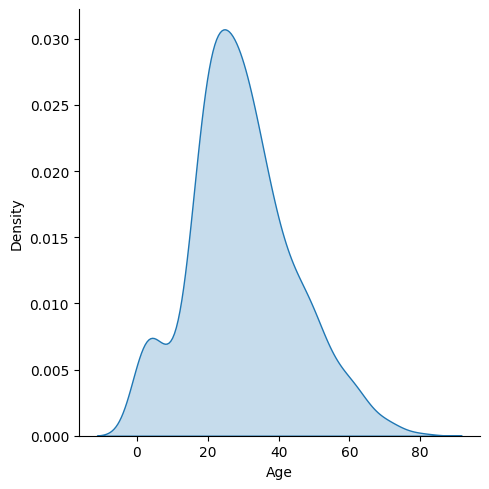

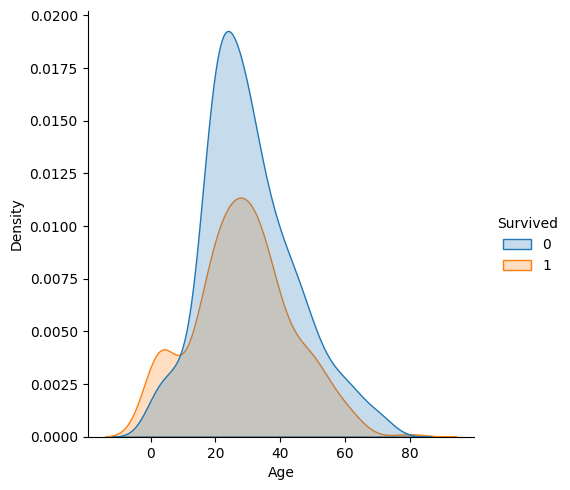

In [6]:
sns.displot(train, x='Age', kind='kde', fill=True)
sns.displot(train, x='Age', hue='Survived', kind='kde', fill=True)

- A huge difference can be seen for age group under 5 years.
- How to preprocess? -(Two groups,under 10 and above or bins?)

<AxesSubplot: xlabel='Age', ylabel='Count'>

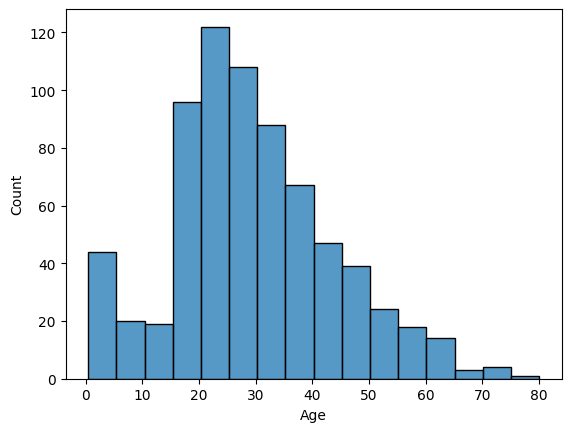

In [7]:
sns.histplot(train, x = 'Age', bins= 16)

<AxesSubplot: xlabel='Age', ylabel='Count'>

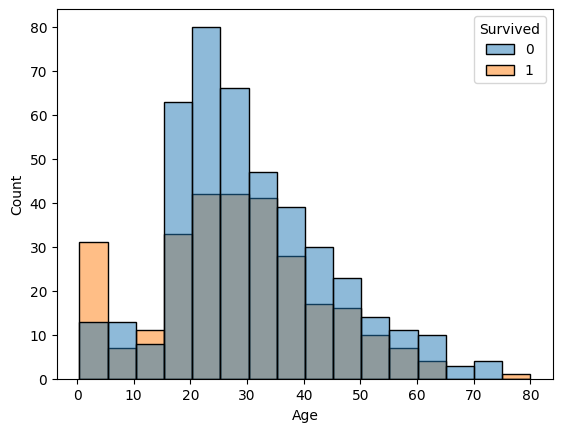

In [8]:
sns.histplot(train, x = 'Age', hue = 'Survived', bins= 16)

<AxesSubplot: xlabel='Age', ylabel='Count'>

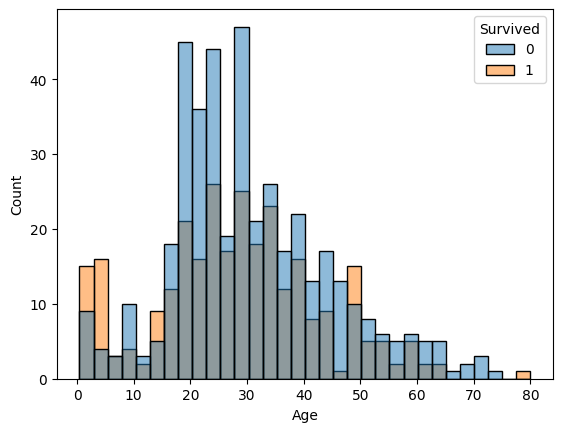

In [9]:
sns.histplot(train, x = 'Age', hue = 'Survived', bins= 32)

- Binning seems like a good idea !

##### Fare

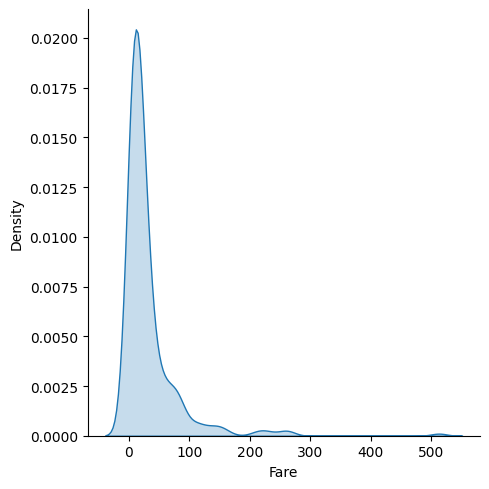

In [10]:
sns.displot(train, x='Fare', kind='kde', fill=True)

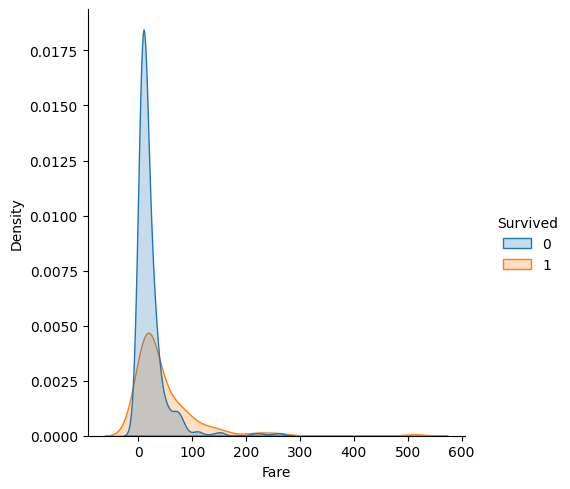

In [11]:
sns.displot(train, x='Fare', hue='Survived', kind='kde', fill=True)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

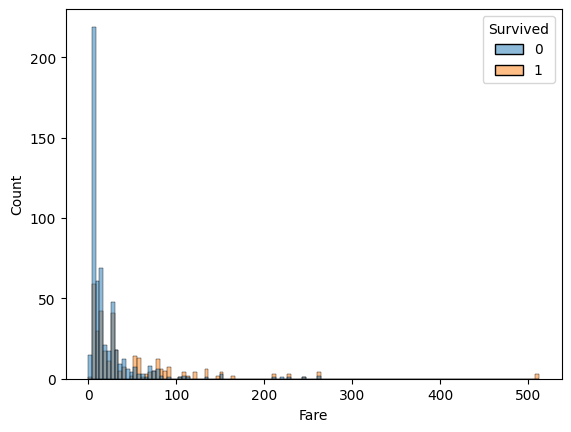

In [12]:
sns.histplot(train, x = 'Fare', hue = 'Survived', bins= 120)

- The data point at 500 seems to be an outlier.(Remove the outliers in the preprocessing stage)
- Outlier : Q(3) + 1.5*(Inter Quartile Range) or Q(1) - 1.5*(Inter Quantile Range)

In [38]:
Fare_Q1 = train['Fare'].quantile(0.25)
Fare_Q3 = train['Fare'].quantile(0.75)
Fare_IQR = Fare_Q3 - Fare_Q1

In [41]:
Fare_Q3 + 1.5*Fare_IQR

65.085925

##### Removing outliers and analysing

In [13]:
train = train.loc[train['Fare'] < 300]

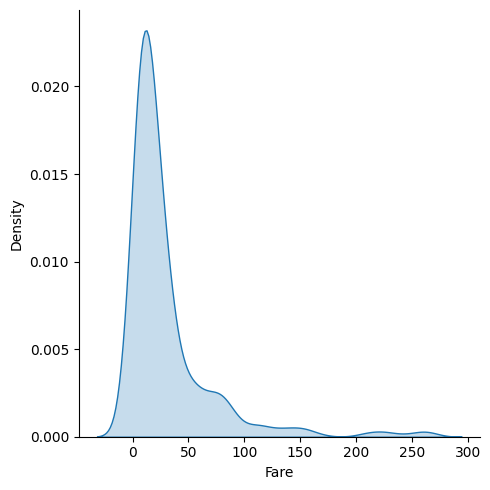

In [14]:
sns.displot(train, x='Fare', kind='kde', fill=True)

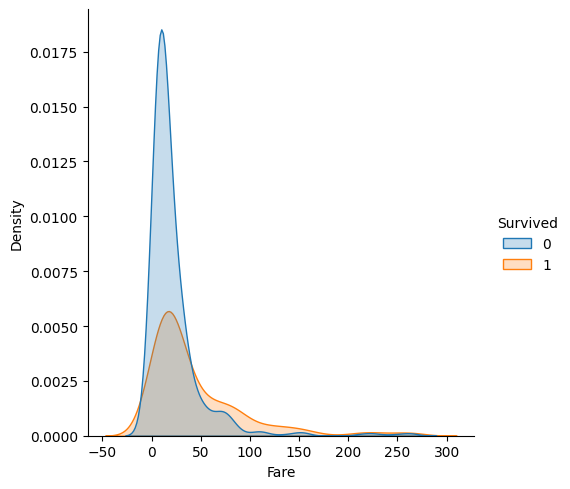

In [15]:
sns.displot(train, x='Fare', hue='Survived', kind='kde', fill=True)

A difference can be seen around 50.

<AxesSubplot: xlabel='Fare', ylabel='Count'>

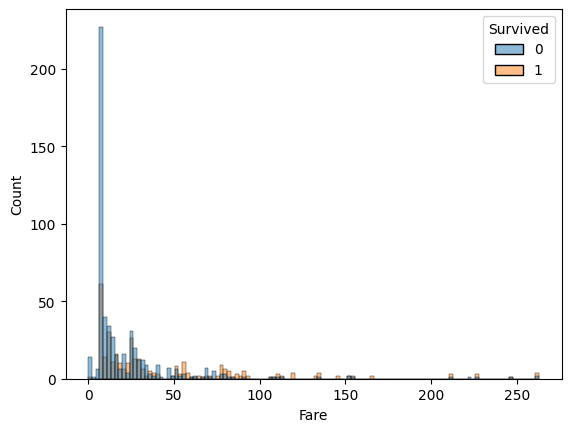

In [16]:
sns.histplot(train, x = 'Fare', hue = 'Survived', bins= 120)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

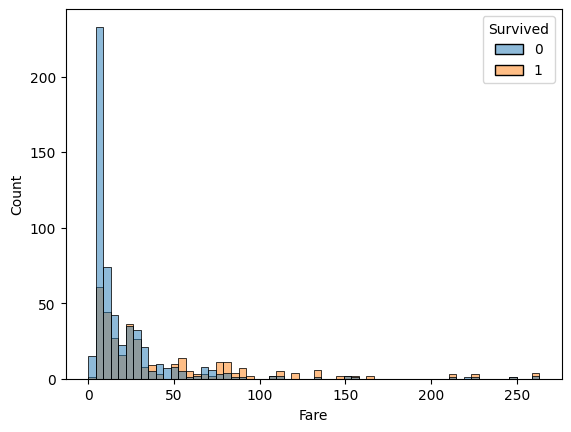

In [17]:
sns.histplot(train, x = 'Fare', hue = 'Survived', bins= 60)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

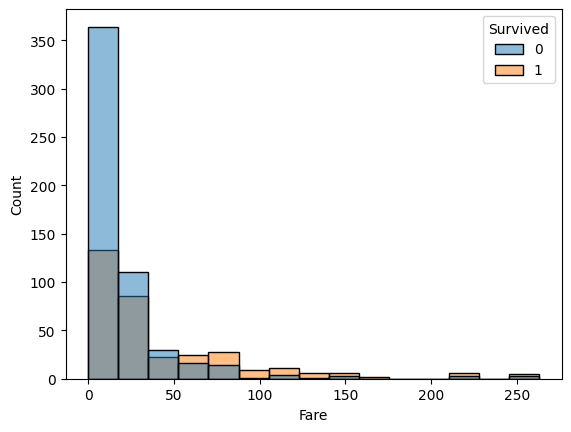

In [18]:
sns.histplot(train, x = 'Fare', hue = 'Survived', bins= 15)

In [47]:
train['Fare_rounded'] = train['Fare'].round(0)

<AxesSubplot: xlabel='Fare_rounded', ylabel='Count'>

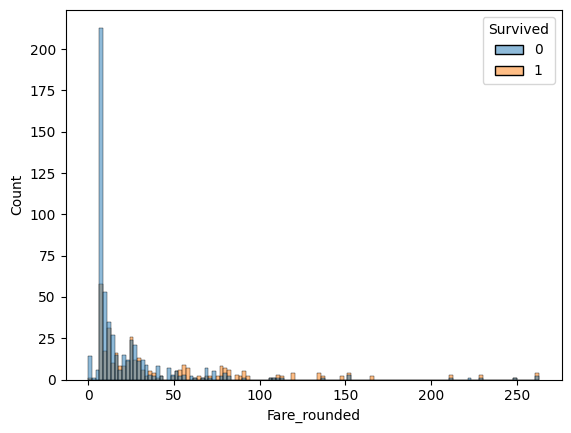

In [48]:
sns.histplot(train, x = 'Fare_rounded', hue = 'Survived', bins= 120)

#### 'SibSp' and 'Parch'

<AxesSubplot: xlabel='Parch', ylabel='Parch%'>

<Figure size 1800x400 with 0 Axes>

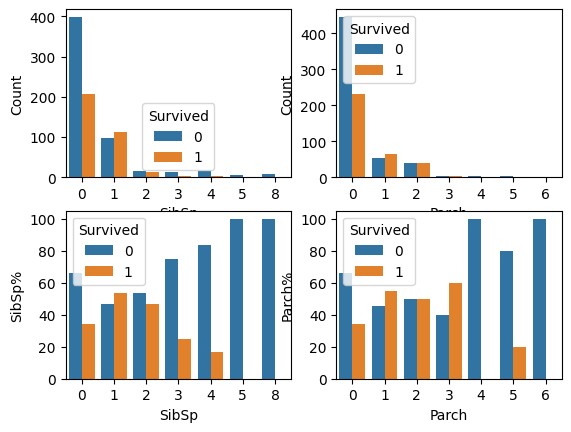

In [19]:
# creating the bar plot
#define dimensions of subplots (rows, columns)
plt.figure(figsize=(18,4))
fig, axes = plt.subplots(2, 2)

#create chart in each subplot
train_SibSp = train.groupby(['SibSp','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_SibSp, x = 'SibSp', y= 'Count', hue = 'Survived', ax=axes[0,0])
train_SibSp['SibSp%'] = 100* train_SibSp['Count']/train_SibSp.groupby(['SibSp'])['Count'].transform('sum')
sns.barplot(data = train_SibSp, x = 'SibSp', y= 'SibSp%', hue = 'Survived', ax=axes[1,0])

#create chart in each subplot
train_parch = train.groupby(['Parch','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_parch, x = 'Parch', y= 'Count', hue = 'Survived', ax=axes[0,1])
train_parch['Parch%'] = 100* train_parch['Count']/train_parch.groupby(['Parch'])['Count'].transform('sum')
sns.barplot(data = train_parch, x = 'Parch', y= 'Parch%', hue = 'Survived', ax=axes[1,1])

<AxesSubplot: xlabel='SibSp', ylabel='Count'>

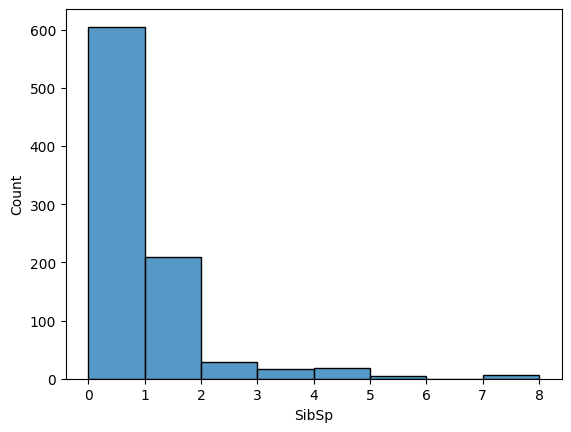

In [20]:
sns.histplot(train, x = 'SibSp', bins= 8)

<AxesSubplot: xlabel='SibSp', ylabel='Count'>

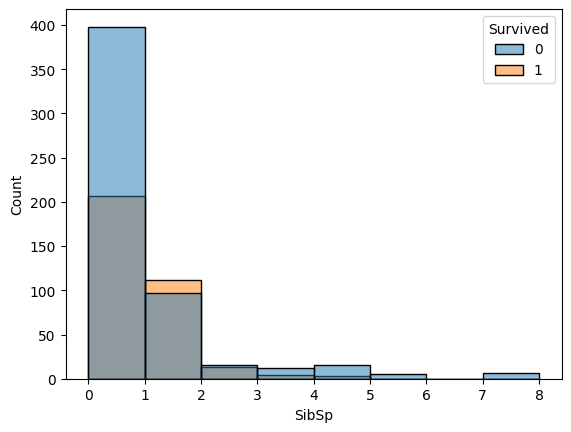

In [21]:
sns.histplot(train, x = 'SibSp', hue = 'Survived', bins= 8)

<AxesSubplot: xlabel='Parch', ylabel='Count'>

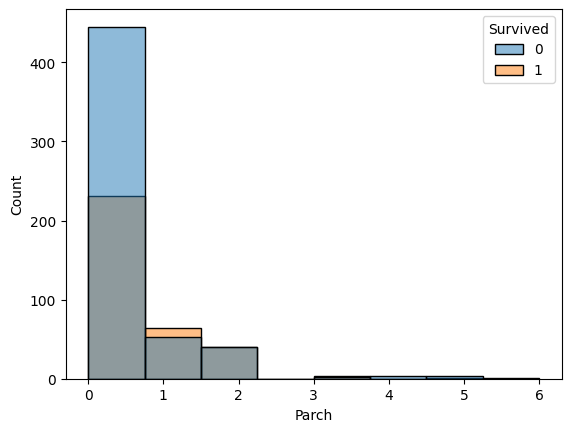

In [22]:
sns.histplot(train, x = 'Parch', hue = 'Survived', bins= 8)

For both SibSp and Parch, with reference to the distribution, a remarkable difference cannot be seen in the chance of survival other than the case for 0.

## Preprocessing and analysing

### Parent Children and Siblings

In [23]:
conditions = [
                train['Parch'] > 0
                ]
verdicts = [
            1
]

train['Parents_Yes_No'] = np.select(conditions, verdicts, default = 0 )

In [24]:
conditions = [
                train['SibSp'] > 0
                ]
verdicts = [
            1
]

train['Siblings_Yes_No'] = np.select(conditions, verdicts, default = 0 )

In [25]:
train['Siblings_Yes_No'].unique()

array([1, 0])

<AxesSubplot: xlabel='Parents_Yes_No', ylabel='Count'>

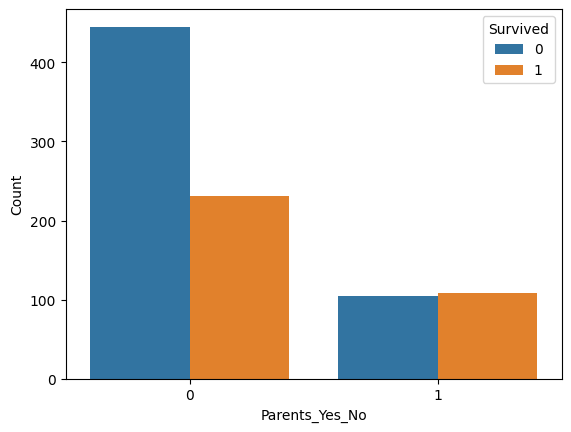

In [26]:
#create chart in each subplot
train_Parents_Yes_No = train.groupby(['Parents_Yes_No','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_Parents_Yes_No, x = 'Parents_Yes_No', y= 'Count', hue = 'Survived')

<AxesSubplot: xlabel='Parents_Yes_No', ylabel='Parents_Yes_No%'>

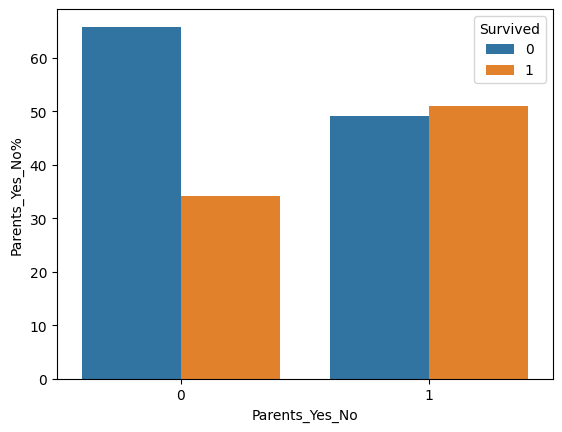

In [27]:
train_Parents_Yes_No['Parents_Yes_No%'] = 100* train_Parents_Yes_No['Count']/ train_Parents_Yes_No.groupby(['Parents_Yes_No'])['Count'].transform('sum')
sns.barplot(data = train_Parents_Yes_No, x = 'Parents_Yes_No', y= 'Parents_Yes_No%', hue = 'Survived')

<AxesSubplot: xlabel='Siblings_Yes_No', ylabel='Count'>

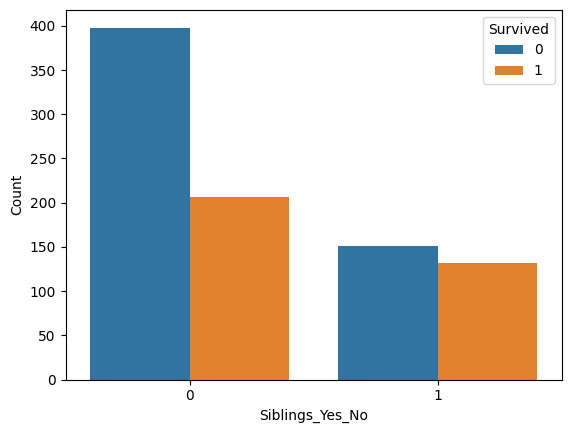

In [28]:
#create chart in each subplot
train_Siblings_Yes_No = train.groupby(['Siblings_Yes_No','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_Siblings_Yes_No, x = 'Siblings_Yes_No', y= 'Count', hue = 'Survived')

<AxesSubplot: xlabel='Siblings_Yes_No', ylabel='Siblings_Yes_No%'>

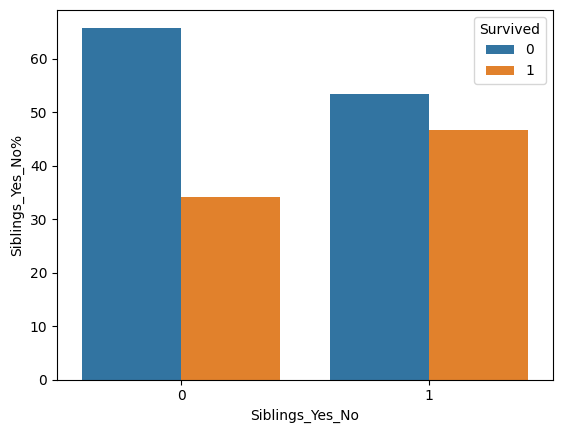

In [29]:
train_Siblings_Yes_No['Siblings_Yes_No%'] = 100* train_Siblings_Yes_No['Count']/ train_Siblings_Yes_No.groupby(['Siblings_Yes_No'])['Count'].transform('sum')
sns.barplot(data = train_Siblings_Yes_No, x = 'Siblings_Yes_No', y= 'Siblings_Yes_No%', hue = 'Survived')

In [30]:
conditions = [
                (train['Parents_Yes_No'] == 1) | (train['Siblings_Yes_No'] == 1)
                ]
verdicts = [
            0
]

train['Is_Alone'] = np.select(conditions, verdicts, default = 1 )

<AxesSubplot: xlabel='Is_Alone', ylabel='Count'>

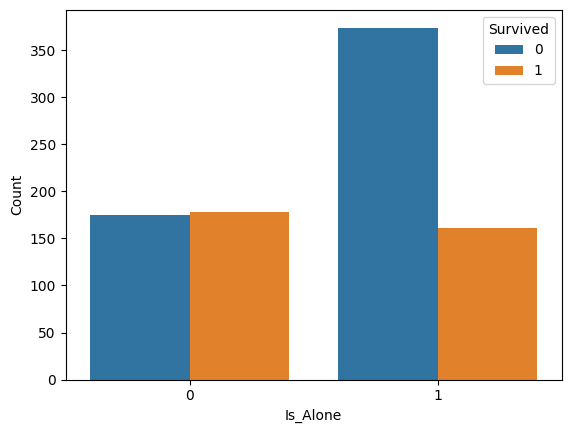

In [31]:
train_Is_Alone = train.groupby(['Is_Alone','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_Is_Alone, x = 'Is_Alone', y= 'Count', hue = 'Survived')

In [32]:
conditions = [
                (train['Parents_Yes_No'] == 0) & (train['Siblings_Yes_No'] == 0),
                (train['Parents_Yes_No'] == 1) & (train['Siblings_Yes_No'] == 0),
                (train['Parents_Yes_No'] == 0) & (train['Siblings_Yes_No'] == 1),
                (train['Parents_Yes_No'] == 1) & (train['Siblings_Yes_No'] == 1),
                ]
verdicts = [
            'No Relations',
            'Only Parents/children',
            'Only Siblings',
            'Both'
]

train['Relations'] = np.select(conditions, verdicts, default = 1 )

<AxesSubplot: xlabel='Relations', ylabel='Count'>

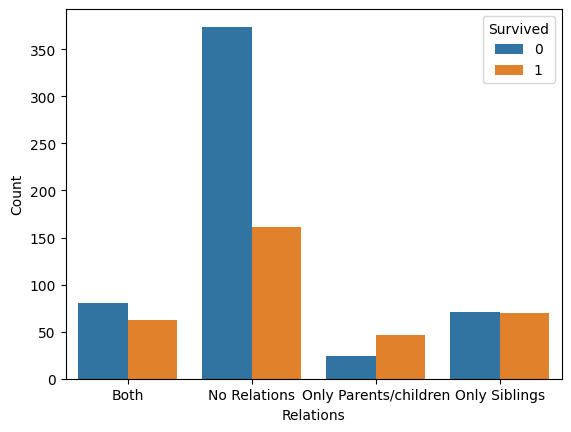

In [33]:
train_Relations = train.groupby(['Relations','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_Relations, x = 'Relations', y= 'Count', hue = 'Survived')

## Multi variable analysis

## Q: Should we include Fare? or is PClass enough ?

In [49]:
#create chart in each subplot
train_Fare = train.groupby(['Fare_rounded','Pclass']).size().reset_index(name = 'Count')

In [50]:
train_Fare

,Fare_rounded,Pclass,Count
0,0.0,1,5
1,0.0,2,6
2,0.0,3,4
3,4.0,3,1
4,5.0,1,1
...,...,...,...
112,222.0,1,1
113,228.0,1,4
114,248.0,1,2
115,262.0,1,2


<AxesSubplot: xlabel='Fare_rounded', ylabel='Count'>

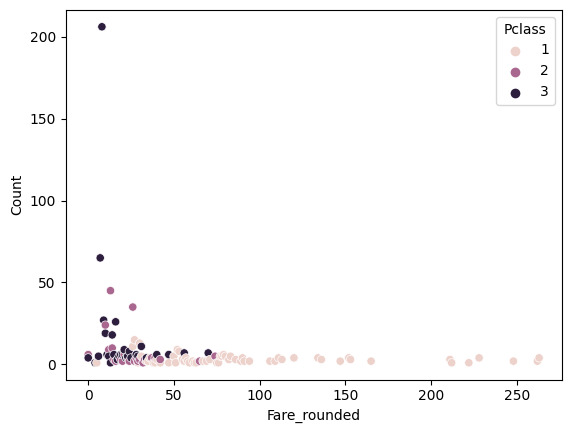

In [51]:
sns.scatterplot(train_Fare, x='Fare_rounded',y ='Count',hue = 'Pclass')

<AxesSubplot: xlabel='Fare_rounded', ylabel='Count'>

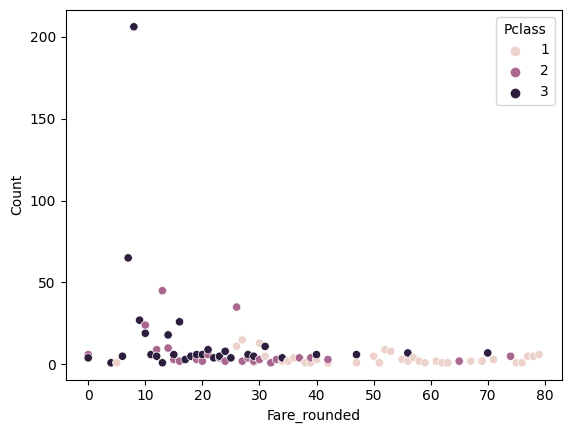

In [53]:
sns.scatterplot(train_Fare.loc[train_Fare['Fare_rounded'] < 80], x='Fare_rounded',y ='Count',hue = 'Pclass')

maybe just include by rounding off to nearest 

<AxesSubplot: xlabel='Age', ylabel='Count'>

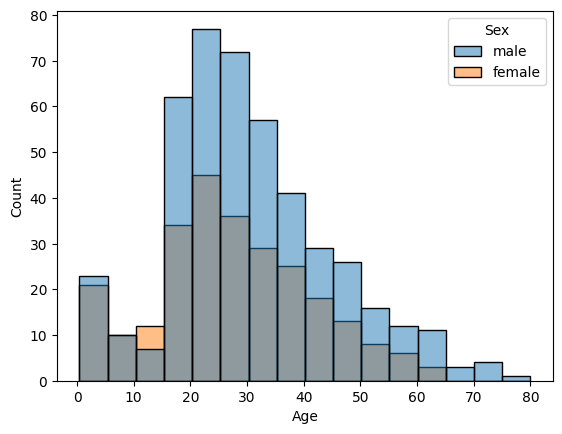

In [35]:
sns.histplot(train, x = 'Age', hue = 'Sex', bins= 16)

## Summary

- Sex,PClass is included.
- SibSp and Parch should be preprocessed.
- Embarked,Cabin is excluded.
- Binned Age
- Fare?